# **Assessment 1**

For our first assessment, our goal is to solve an imputation problem: we will create a neural network architecture that learns how to recover missing portions of an image.

This is an important problem in magnetic resonance imaging (MRI), where patient scans are often limited to a few areas to avoid lengthy scanning times.

In particular, we are going to focus on images of human heads. We have managed to gain access to one hundred images of patient's heads but, unfortunately, these images have a significant portion of missing information. Your goal during the assessment is to design a neural network that can recover these missing portions.

<br>

---

<br>

We do not have access to the labels for the images we want to recover, so we will have to be a bit creative to obtain a workable dataset on which to train our neural network.

Fortunately for us, we have access to a generative model that has been trained to produce realistic-looking MRI images of patient's heads. Using this model, you will create an appropriate dataset to train your architecture. We have provided you with the basic setup code to start using this generative model in **Question 1** below.

The corrupted images that we want to recover are contained in the numpy file `test_set.npy` of this repository. The file contains 100 patient images with a size of 64x64 pixels.

The architecture that you design in this assessment should use the artificially-generated dataset in order to recover the missing information in the images contained in `test_set.npy`.

<br>

All answers to the assessment should be contained within the structure below, but you are free to add new code and text cells as required to your answers. Read the text for each question and follow the instructions carefully. Answers that do not follow this structure will not be marked. **Do NOT change the name of this file.**

Please, **make sure to execute all your cells and save the result of the execution**. We will only mark cells that have been executed and will not execute any cells ourselves.

<br>

---

<br>

<br><br>

## **Question 1**  (25%)

Using the provided image-generation network, create a dataset of brain images that will later be used to train your chosen architecture.

Given that you will likely want to use this dataset multiple times during training, we recommend that you save the generated images to an appropriate folder in your GDrive.

Once you have generated your dataset, load and display ten of your generated images here.

We have also provided you with some corrupted images in the file `test_set.npy` of this repository. You should also load and display ten of these corrupted images here.

Below, we have provided template code, including some required downloads and installations, so that you can easily use the trained generative model. Sample generation in this model is done using the function `generate`, and is controlled by some input arguments. It is your job to figure out a sensible set of parameters that will produce images that are useful for the requirements of your task.

<br>

In [1]:
import os
import sys
import numpy as np
import torch
from torch import nn
from torchvision.utils import make_grid
from torch.utils.data import Dataset, TensorDataset
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image, ImageDraw
from tqdm import tqdm
import torch.autograd as autograd
from torch.autograd import Variable
import torch.nn.functional as F
import random

In [2]:
!pip install livelossplot
from livelossplot import PlotLosses

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# INSTRUCTIONS:
# Open in a BROWSER https://drive.google.com/file/d/1I8Ry7Z_QqnlARwOuDgN4NPCd-GcLw1OC/view?usp=drive_link
# Download the file cw1_files.zip
# Go to https://drive.google.com/ and log in with the account you will be using for this coursework
# In the folder 'My Files' upload cw1_files.zip (DO NOT UNZIP THE FILE)
# Run the following:

!unzip /content/drive/MyDrive/cw1_files.zip -d ./
!chmod +x run.sh
!bash ./run.sh
sys.path.append('/content/ese-invldm')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  /content/drive/MyDrive/cw1_files.zip
  inflating: ./files/config_training.yml  
  inflating: ./run.sh                
  inflating: ./ese-invldm/setup.py   
  inflating: ./files/default_config.yml  
  inflating: ./ese-invldm/ese_invldm/ese_invldm.py  
  inflating: ./ese-invldm/ese_invldm/__init__.py  
  inflating: ./files/autoencoder/autoencoder_ckpt_latest.pth  
  inflating: ./files/diffusion/diffusion_ckpt_latest.pth  
Cloning the repository from https://github.com/dpelacani/InverseLDM.git...
Cloning into 'InverseLDM'...
remote: Enumerating objects: 1331, done.
remote: Counting objects: 100% (261/261), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 1331 (delta 167), reused 182 (delta 100), pack-reused 1070 (from 1)
Receiving objects: 100% (1331/1331), 467.16 KiB | 1.83 MiB/s, done.
Resolving deltas: 100% (875/875), done.
  P

In [ ]:
from ese_invldm import generate

"""
Generates samples using a diffusion-based generative model.

This function leverages a pre-configured diffusion model to produce synthetic samples.
The sampling process supports adjustable parameters for total samples, inference steps, and batch size.
A scheduler and temperature can also be configured to control the sampling behaviour.

Parameters:
    num_samples (int):
        Total number of samples to generate.
    num_inference_steps (int):
        Number of diffusion inference steps.
        The minimum number of steps is 1, but we recommend exploring the range from 10 to 50.
        Please note that more steps will increase quality but also the computational cost. Be careful not
        to burn through your credits by using a very large number of steps!
    batch_size (int):
        Number of samples to process in each batch during sampling.
    scheduler (str, optional):
        Sampling scheduler to use (e.g., "ddim", "ddpm"). You can quickly test which one provides the most appropriate results
        for this task.
    temperature (float, optional):
        Sampling temperature to control randomness, given as a number between 0 and 1. Higher values produce more diverse outputs.
    seed (int, optional):
        Random seed for reproducibility. Defaults to 42.

Returns:
    list:
        A list containing the batches of generated samples, where each sample
        corresponds to a single data instance produced by the diffusion model.

"""
num_sample = 2048
samples = generate(num_samples=num_sample, num_inference_steps=50, batch_size=64, scheduler='ddim', temperature=0.7)

/content/InverseLDM/invldm/runners/base_runner.py:137: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_states = torch.load(path)


Batch 0


100%|██████████| 50/50 [00:34<00:00,  1.46it/s]


Batch 1


100%|██████████| 50/50 [00:34<00:00,  1.45it/s]


Batch 2


100%|██████████| 50/50 [00:34<00:00,  1.46it/s]


Batch 3


100%|██████████| 50/50 [00:34<00:00,  1.45it/s]


Batch 4


100%|██████████| 50/50 [00:34<00:00,  1.45it/s]


Batch 5


100%|██████████| 50/50 [00:34<00:00,  1.46it/s]


Batch 6


100%|██████████| 50/50 [00:34<00:00,  1.45it/s]


Batch 7


100%|██████████| 50/50 [00:34<00:00,  1.45it/s]


Batch 8


100%|██████████| 50/50 [00:34<00:00,  1.46it/s]


Batch 9


100%|██████████| 50/50 [00:34<00:00,  1.45it/s]


Batch 10


100%|██████████| 50/50 [00:34<00:00,  1.45it/s]


Batch 11


100%|██████████| 50/50 [00:34<00:00,  1.45it/s]


Batch 12


100%|██████████| 50/50 [00:34<00:00,  1.45it/s]


Batch 13


100%|██████████| 50/50 [00:34<00:00,  1.45it/s]


Batch 14


100%|██████████| 50/50 [00:34<00:00,  1.45it/s]


Batch 15


100%|██████████| 50/50 [00:34<00:00,  1.45it/s]


Batch 16


100%|██████████| 50/50 [00:34<00:00,  1.45it/s]


Batch 17


100%|██████████| 50/50 [00:34<00:00,  1.45it/s]


Batch 18


100%|██████████| 50/50 [00:34<00:00,  1.46it/s]


Batch 19


100%|██████████| 50/50 [00:34<00:00,  1.45it/s]


Batch 20


100%|██████████| 50/50 [00:34<00:00,  1.45it/s]


Batch 21


100%|██████████| 50/50 [00:34<00:00,  1.45it/s]


Batch 22


100%|██████████| 50/50 [00:34<00:00,  1.45it/s]


Batch 23


100%|██████████| 50/50 [00:34<00:00,  1.45it/s]


Batch 24


100%|██████████| 50/50 [00:34<00:00,  1.45it/s]


Batch 25


100%|██████████| 50/50 [00:34<00:00,  1.45it/s]


Batch 26


100%|██████████| 50/50 [00:34<00:00,  1.45it/s]


Batch 27


100%|██████████| 50/50 [00:34<00:00,  1.45it/s]


Batch 28


100%|██████████| 50/50 [00:34<00:00,  1.45it/s]


Batch 29


100%|██████████| 50/50 [00:34<00:00,  1.45it/s]


Batch 30


100%|██████████| 50/50 [00:34<00:00,  1.45it/s]


Batch 31


100%|██████████| 50/50 [00:34<00:00,  1.45it/s]


I chose 2048 samples because I wanted around 2000 images and 2048 was the closest power of two. That way I have equal batches of 64 samples.

In [ ]:
samples[31].shape

torch.Size([64, 1, 64, 64])

In [ ]:
len(samples)

32

<ipython-input-190-d1ff8fa1581d>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  samples_tensor = torch.tensor(samples[0][:10], dtype=torch.float32)


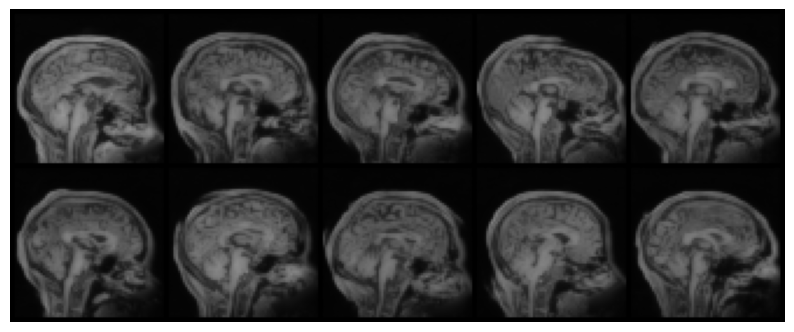

In [ ]:
samples_tensor = torch.tensor(samples[0][:10], dtype=torch.float32)
grid = make_grid(samples_tensor, nrow=5)
plt.figure(figsize=(10, 5))
plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
plt.axis('off')
plt.show()

In [ ]:
# written with the help of ChatGPT - Reference 1
save_dir = '/content/drive/MyDrive/generated_images'
os.makedirs(save_dir, exist_ok=True)

for batch_idx, batch in enumerate(samples): # [32, 64, 1, 64, 64]
    for img_idx, sample in enumerate(batch): # [64, 1, 64, 64]

        img = sample[0].cpu().numpy()
        img = (img - img.min()) / (img.max() - img.min()) * 255  # Scale to [0, 255]

        img = Image.fromarray(img.astype('uint8'))

        img.save(os.path.join(save_dir, f'generated_image_batch{batch_idx}_img{img_idx}.png'))

print(f"Saved {32 * 64} images to {save_dir}")

Saved 2048 images to /content/drive/MyDrive/generated_images


In [4]:
test_images = np.load('/content/drive/MyDrive/DL_cw/test_set.npy')
test_images.shape

(100, 1, 64, 64)

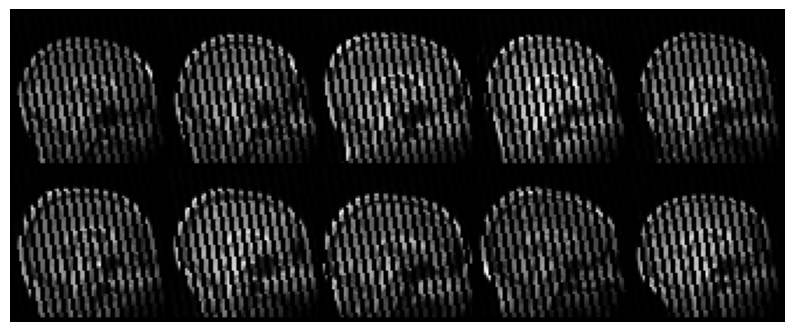

In [5]:
images_tensor = torch.tensor(test_images, dtype=torch.float32)
grid = make_grid(images_tensor[:10], nrow=5)
plt.figure(figsize=(10, 5))
plt.imshow(grid.permute(1, 2, 0).numpy())
plt.axis('off')
plt.show()

<br>

---

<br>

## **Question 2**  (25%)

Using the data generated in **Question 1**, create a PyTorch `TensorDataset` and a `DataLoader` for the training set.

Using the provided corrupted images inside `test_set.npy`, create another `TensorDataset` and a `DataLoader` for the test set.

The training dataset should provide batches of brain images generated in **Question 1** and should corrupt these images appropriately so that they resemble images in the test set. The dataset should also pair each image with its corresponding un-corrupted image as a label.

The test dataset should provide the corrupted images provided, for which no labels are available.

Display here ten images of your training dataset and ten images of your test dataset, and their corresponding labels when available.

<br>



### 1. Corruption Pattern
Let's try to recreate the pattern of the corruption of the test dataset by using a matrix with 0 and 1 that we are going to multiply with our generated images to create new corrupted images:

In [6]:
# This was my idea but the implementation has been done with the help of ChaGPT - Reference 2
def generate_checked_pattern(matrix_width=64, matrix_height=64,
                             rect_width=2, rect_height=5, gap_width=1, gap_height=0, adjust=11):
    n_cols = (matrix_width + gap_width) // (rect_width + gap_width)
    n_rows = (matrix_height + gap_height) // (rect_height + gap_height)

    matrix = np.zeros((matrix_height, matrix_width), dtype=int)

    for i in range(n_rows):
        for j in range(n_cols+adjust): # I added adjust to correct a problem with the pattern
            row_start = i * (rect_height + gap_height)
            row_end = row_start + rect_height
            col_start = j * (rect_width)
            col_end = col_start + rect_width
            col_start -= gap_width * i
            col_end -= gap_width * i

            if (i + j) % 2 == 0:
                matrix[row_start:row_end, col_start:col_end] = 1

    return matrix

# Example usage:
matrix_width = 64
matrix_height = 64
rect_width = 2
rect_height = 3
gap_width = 1
gap_height = 0

pattern_matrix = generate_checked_pattern(matrix_width, matrix_height, rect_width, rect_height, gap_width, gap_height)
print(pattern_matrix)


[[1 1 0 ... 1 0 0]
 [1 1 0 ... 1 0 0]
 [1 1 0 ... 1 0 0]
 ...
 [1 1 0 ... 1 0 0]
 [1 1 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


### 2. Creation of the Train Dataset

In [7]:
class CustomDataset(Dataset):
    def __init__(self, img_dir, pattern_func, transform=None):

        self.img_dir = img_dir
        self.transform = transform
        self.pattern_func = pattern_func
        self.image_files = os.listdir(img_dir)

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):

        image_name = self.image_files[idx]
        image_path = os.path.join(self.img_dir, image_name)
        image = Image.open(image_path).convert("L")

        corrupted_image = image.copy()
        pattern = self.pattern_func()
        corrupted_image = corrupted_image * pattern
        corrupted_image = Image.fromarray(corrupted_image.astype(np.uint8))

        label = image

        if self.transform:
            corrupted_image = self.transform(corrupted_image)
            label = self.transform(label)

        return corrupted_image, label


In [8]:
img_dir = '/content/drive/MyDrive/generated_images'
batch_size = 64

transform = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = CustomDataset(img_dir=img_dir, pattern_func=generate_checked_pattern ,transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


In [9]:
corrupted_images, labels = next(iter(train_loader))
corrupted_images.shape

torch.Size([64, 1, 64, 64])

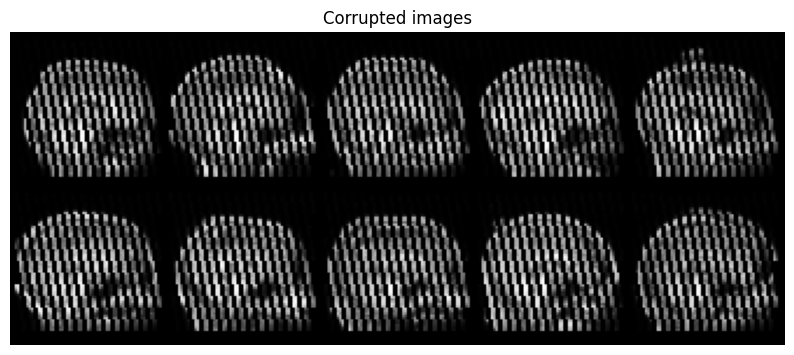

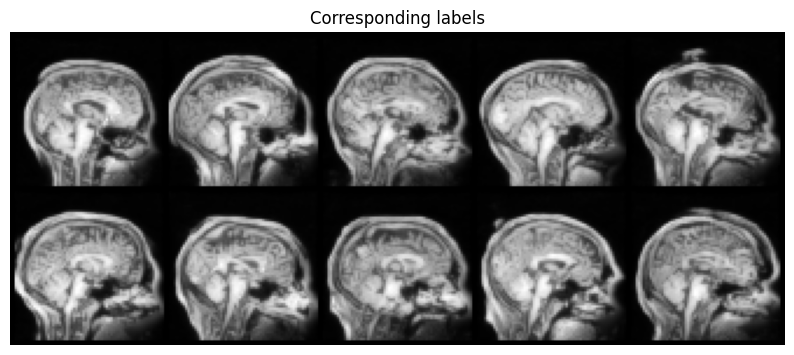

In [10]:
grid_images = make_grid(corrupted_images[:10],  nrow=5)
plt.figure(figsize=(10, 5))
plt.imshow(grid_images.permute(1, 2, 0).cpu().numpy())
plt.axis('off')
plt.title("Corrupted images")

grid_labels = make_grid(labels[:10],  nrow=5)
plt.figure(figsize=(10, 5))
plt.imshow(grid_labels.permute(1, 2, 0).cpu().numpy())
plt.axis('off')
plt.title("Corresponding labels")
plt.show()

### 3. Test Dataset

In [11]:
class CustomTestDataset(Dataset):
    def __init__(self, data, transform=None):

        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = self.data[idx][0]

        if self.transform:
            image = self.transform(image)

        return image


In [12]:
transform_test = transforms.Compose([transforms.ToTensor()])
test_dataset = CustomTestDataset(test_images, transform=transform_test)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=False)

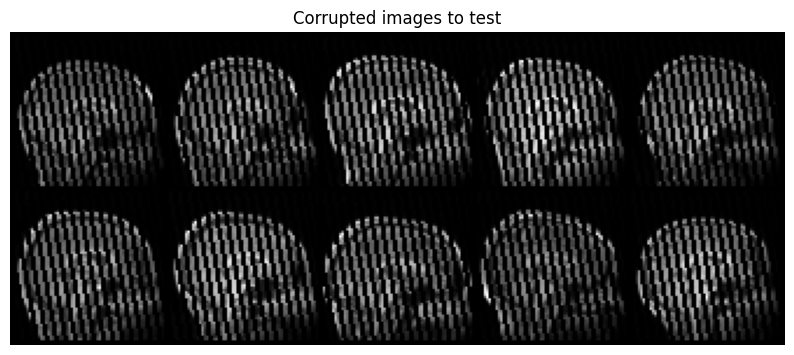

In [13]:
images = next(iter(test_loader))
grid_test_images = make_grid(images[:10], nrow=5)
plt.figure(figsize=(10, 5))
plt.imshow(grid_test_images.permute(1, 2, 0).cpu().numpy())
plt.axis('off')
plt.title("Corrupted images to test")
plt.show()

<br>

---

<br>

## **Question 3** (50%)

Using the dataset created in **Question 2**, design and train an architecture to recover the missing image lines of the provided test dataset.

Once you have trained your architecture, display here ten images of the test set with the recovered lines filled in.

Additionally, save the test data with the missing values filled in into a numpy file called `test_set_nogaps.npy`. These images should be **in the same order** as those in the `test_set.npy` file and should have the same pixel size of 64x64. **Any images not contained in the `test_set_nogaps.npy` file or incorrectly ordered will not be marked.**

You have freedom to choose an architecture that you consider appropriate to solve this problem. However, you will need to train your chosen architecture as part of the assessment: **pre-trained networks are not allowed**.

You will be assessed by the quality of your predictions of the missing data values and additional marks will be given for originality in your network design choices. You should include, as part of your answer, a paragraph explaining the architecture you have chosen and any additional design choices and hyperparameters that have been important to build your solution.

This is an open-book assessment and you are encouraged to use resources online, including  tools like chatGPT. However, make sure to always mention the sources for your code and ideas, including websites, papers, and tools like chatGPT.

<br>


### Table of Content :  
1. Convolutional VAE
2. U-Net
3. Conclusion


### 1. Convolutional VAE :

I used the code we saw during the lecture and I made a few changes and checked if I had the right dimensions.

In [ ]:
class VAE_Encoder_Conv(nn.Module):
  def __init__(self):

    super(VAE_Encoder_Conv, self).__init__()

    self.layer1 = nn.Sequential(
        nn.Conv2d(1,  20, 3, padding=3),
        # nn.BatchNorm2d(20),
        nn.GELU(),
        nn.MaxPool2d(2)
    )  # Dims in 64x64 -> out 32x32

    self.layer2 = nn.Sequential(
        nn.Conv2d(20, 40, 3, padding="same"),
        # nn.BatchNorm2d(40),
        nn.GELU(),
        nn.MaxPool2d(2)
    )  # Dims in 32x32 -> out 16x16

    self.layer3 = nn.Sequential(
        nn.Conv2d(40, 60, 3, padding="same"),
        # nn.BatchNorm2d(60),
        nn.GELU(),
        nn.MaxPool2d(2)
    )  # Dims in 16x16 -> out 8x8

    self.layerMu = nn.Sequential(
        nn.Conv2d(60, 120, 1),
    )  # Dims in 8x8 -> out 8x8

    self.layerSigma = nn.Sequential(
        nn.Conv2d(60, 120, 1),
    )  # Dims in 8x8 -> out 8x8

  def forward(self, x, print_shape=False):  # Custom pytorch modules should follow this structure
    '''
    x: [float] the MNIST image
    '''

    x = self.layer1(x)
    if print_shape:
      print('L1: '+str(x.shape))
    x = self.layer2(x)
    if print_shape:
      print('L2: '+str(x.shape))
    x = self.layer3(x)
    if print_shape:
      print('L3: '+str(x.shape))
    mu =  self.layerMu(x)
    sigma = torch.exp(self.layerSigma(x))
    return mu, sigma


In [ ]:
encoder = VAE_Encoder_Conv()

images, labels = next(iter(train_loader))
print('Input shape: '+str(images[0].shape))
mu, sigma = encoder(images[0].unsqueeze(0), print_shape=True)

print('Mu shape: '+str(mu.detach().shape))
print('Sigma shape:'+str(sigma.detach().shape))

Input shape: torch.Size([1, 64, 64])
L1: torch.Size([1, 20, 34, 34])
L2: torch.Size([1, 40, 17, 17])
L3: torch.Size([1, 60, 8, 8])
Mu shape: torch.Size([1, 120, 8, 8])
Sigma shape:torch.Size([1, 120, 8, 8])


In [ ]:
class VAE_Decoder_Conv(nn.Module):
  def __init__(self):

    super(VAE_Decoder_Conv, self).__init__()

    self.layerLatent = nn.Sequential(
        nn.Conv2d(120, 60, 1),
        # nn.BatchNorm2d(60),
        nn.GELU(),
        nn.Upsample(scale_factor=2, mode='nearest')
    )  # Dims in 8x8 -> out 16x16

    self.layer1 = nn.Sequential(
        nn.Conv2d(60, 40, 3, padding='same'),
        # nn.BatchNorm2d(40),
        nn.GELU(),
        nn.Upsample(scale_factor=2, mode='nearest')
    )  # Dims in 16x16 -> out 32x32

    self.layer2 = nn.Sequential(
        nn.Conv2d(40, 20, 3, padding='same'),
        # nn.BatchNorm2d(20),
        nn.GELU(),
        nn.Upsample(scale_factor=2, mode='nearest')
    )  # Dims in 32x32 -> out 64x64

    self.layer3 = nn.Sequential(
        nn.Conv2d(20, 1, 3, padding='same'),
        # nn.BatchNorm2d(1),
        nn.Sigmoid()
    )  # Dims in 64x64 -> out 64x64

  def forward(self, z, print_shape=False):  # Custom pytorch modules should follow this structure
    '''
    x: [float] the MNIST image
    '''

    z = self.layerLatent(z)
    z = self.layer1(z)
    if print_shape:
      print('L1: '+str(z.shape))
    z = self.layer2(z)
    if print_shape:
      print('L2: '+str(z.shape))
    z = self.layer3(z)
    if print_shape:
      print('L3: '+str(z.shape))
    return z  # Crop the output



Latent shape: torch.Size([1, 120, 8, 8])
L1: torch.Size([1, 40, 32, 32])
L2: torch.Size([1, 20, 64, 64])
L3: torch.Size([1, 1, 64, 64])
Image shape: torch.Size([1, 1, 64, 64])


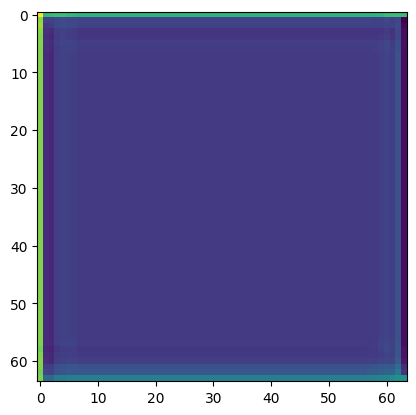

In [ ]:
decoder = VAE_Decoder_Conv()

latent_vec = torch.zeros(1,120,8,8)

print('Latent shape: '+str(latent_vec.shape))

recon = decoder(latent_vec, print_shape=True)

print('Image shape: '+str(recon.shape))

plt.imshow(recon.detach().cpu().squeeze())


In [ ]:
class VAE_Conv(nn.Module):
  def __init__(self, device):
    '''
    Class combines the Encoder and the Decoder with a VAE latent space.
    '''
    super(VAE_Conv, self).__init__()
    self.device = device
    self.encoder = VAE_Encoder_Conv()
    self.decoder = VAE_Decoder_Conv()
    self.distribution = torch.distributions.Normal(0, 1)

  def sample_latent_space(self, mu, sigma):
    z = mu + sigma * self.distribution.sample(mu.shape).to(self.device)
    kl_div = (sigma**2 + mu**2 - torch.log(sigma) - 1/2).sum()
    return z, kl_div

  def forward(self, x):
    '''
    x - [float] A batch of images from the data-loader
    '''

    mu, sigma = self.encoder(x)
    z, kl_div = self.sample_latent_space(mu, sigma)
    z = self.decoder(z)
    return z, kl_div

print('done')

done


torch.Size([1, 64, 64])


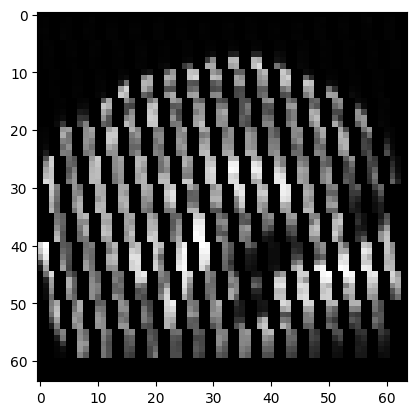

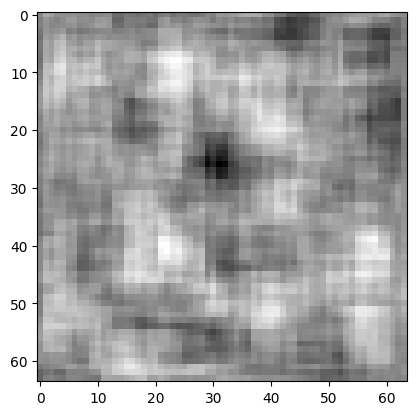

In [ ]:
vae = VAE_Conv('cpu')

images, labels = next(iter(train_loader))
print(images[0].shape)
recon, _ = vae(images[10].unsqueeze(0))

plt.figure(); plt.imshow(images[0].squeeze(), cmap='gray')
plt.figure(); plt.imshow(recon.cpu().detach().squeeze(), cmap='gray')


In [ ]:
def conv_vae_train(model, train_loader, lr, betas, wd, epochs=30, device='cpu'):
  model.train()
  opt = torch.optim.Adam(model.parameters(), lr=lr, betas=betas, weight_decay=wd)
  liveloss = PlotLosses()
  for epoch in tqdm(range(0, epochs)):
    logs = {'log loss': 0}
    train_loss = 0
    for batch, label in (train_loader):
      batch, label = batch.to(device), label.to(device)
      opt.zero_grad()
      x_hat, KL = model(batch)
      # loss = ((label - x_hat)**2).sum() + 1e-6 * epoch * KL # here we compare to the label and not the input image
      loss = F.mse_loss(x_hat, label, reduction='sum') + 1e-6 * epoch * KL
      train_loss += loss.item()
      loss.backward()
      opt.step()
    logs['log loss'] += train_loss / len(train_loader.dataset)
    liveloss.update(logs)
    liveloss.draw()

  return model

In [ ]:
lr = 1e-2
wd = 0.1
betas = (0.9, 0.999)

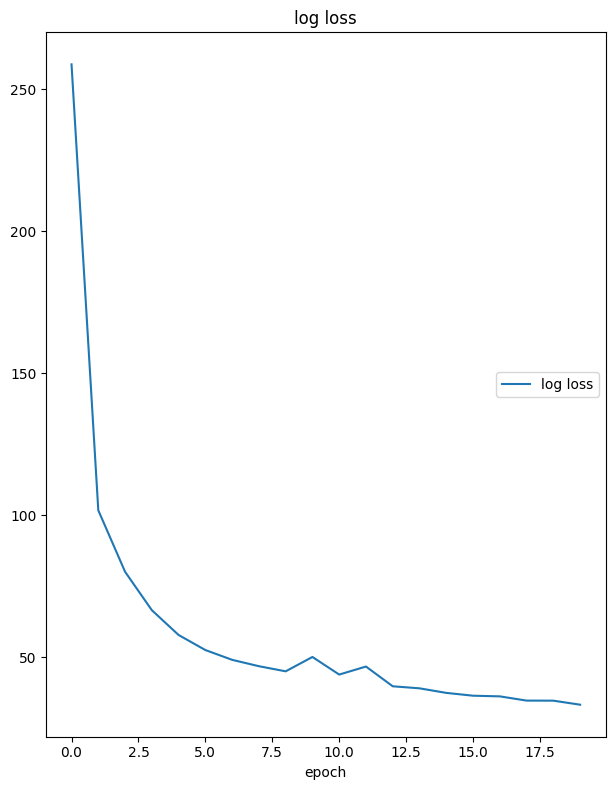

100%|██████████| 20/20 [02:41<00:00,  8.09s/it]

log loss
	log loss         	 (min:   33.289, max:  258.719, cur:   33.289)
done


In [ ]:
device = 'cuda'

vae_conv = VAE_Conv(device).to(device)
vae_conv = conv_vae_train(vae_conv, train_loader, lr=lr, betas=betas, wd=wd, epochs=20, device=device)

print('done')

In [ ]:
model_save_name = 'Conv_VAE_model.pt'
path = F"/content/drive/MyDrive/{model_save_name}"

torch.save(vae_conv.state_dict(), path)

torch.Size([1, 64, 64])


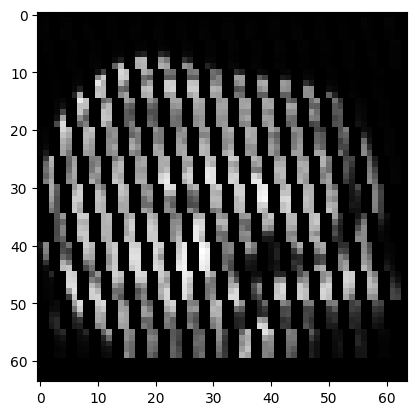

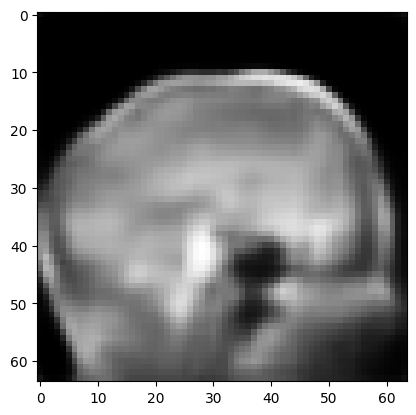

In [ ]:
images, labels = next(iter(train_loader))
print(images[0].shape)
recon, _ = vae_conv(images[10].unsqueeze(0).cuda())

plt.figure(); plt.imshow(images[0].squeeze(), cmap='gray')
plt.figure(); plt.imshow(recon.cpu().detach().squeeze(), cmap='gray')


In [ ]:
model_save_name = 'Conv_VAE_model.pt'
path = F"/content/drive/MyDrive/{model_save_name}"

model = VAE_Conv(device).to(device)
model.load_state_dict(torch.load(path))
model.eval()

<ipython-input-95-756f088a1ead>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path))


VAE_Conv(
  (encoder): VAE_Encoder_Conv(
    (layer1): Sequential(
      (0): Conv2d(1, 20, kernel_size=(3, 3), stride=(1, 1), padding=(3, 3))
      (1): GELU(approximate='none')
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (layer2): Sequential(
      (0): Conv2d(20, 40, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (1): GELU(approximate='none')
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (layer3): Sequential(
      (0): Conv2d(40, 60, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (1): GELU(approximate='none')
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (layerMu): Sequential(
      (0): Conv2d(60, 120, kernel_size=(1, 1), stride=(1, 1))
    )
    (layerSigma): Sequential(
      (0): Conv2d(60, 120, kernel_size=(1, 1), stride=(1, 1))
    )
  )
  (decoder): VAE_Decoder_Conv(
    (layerLatent): Sequential(
      (0): C

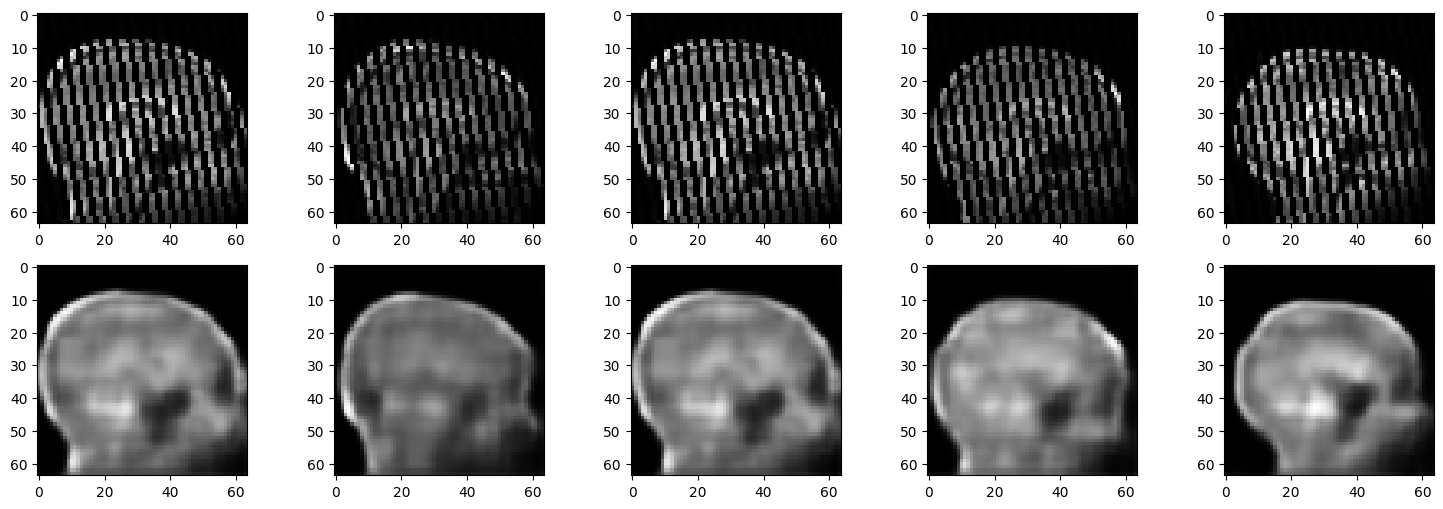

In [ ]:
images = next(iter(test_loader))
_, ax = plt.subplots(2, 5, figsize=[18.5, 6])
for n, idx  in enumerate(torch.randint(0,images.shape[0], (5,))):
  recon, _ = model(images[idx].unsqueeze(0).cuda())  # Are mu and sigma correct
  ax[0, n].imshow(images[idx].squeeze(), cmap='gray')
  ax[1, n].imshow(recon.cpu().detach().squeeze(), cmap='gray')




We are going to save the reconstitued images in the file `test_set_nogaps.npy`:

In [ ]:
reconstituted_images = []

for batch in test_loader:
    batch = batch.cuda()

    with torch.no_grad():
        reconstituted_batch, _ = model(batch)

    reconstituted_batch_np = reconstituted_batch.cpu().numpy()

    reconstituted_images.append(reconstituted_batch_np)

reconstituted_images = np.concatenate(reconstituted_images, axis=0)

np.save('/content/drive/MyDrive/test_set_nogaps_ConvVAE.npy', reconstituted_images)
print("images saved !")


images saved !


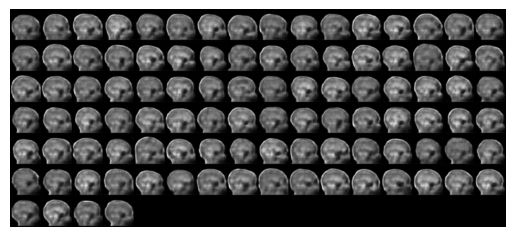

In [ ]:
test_images = np.load('/content/drive/MyDrive/test_set_nogaps_ConvVAE.npy')
test_images.shape
images_tensor = torch.tensor(test_images, dtype=torch.float32)
grid = make_grid(images_tensor, nrow=16)
# plt.figure(figsize=(10, 5))
plt.imshow(grid.permute(1, 2, 0).numpy())
plt.axis('off')
plt.show()

**Conclusion** : This model works pretty well and generates relatively good images. However, there is still some blurriness, which is an issue for reconstructed radio brain images. Greater precision is required to ensure the images meet the necessary clarity standards.

Let's test a **Unet** model which easier to train than GANs but should generates more accurate images:

### 3. U-Net

I used the code in the lecture on diffusion model and changed it a bit to remove the diffusion part.

In [14]:
class ConvBlock(nn.Module):

    def __init__(self, in_c, out_c):
        super().__init__()
        self.conv = nn.Conv2d(in_c, out_c, kernel_size=3, padding=1)
        self.bn = nn.BatchNorm2d(out_c)
        self.act = nn.ReLU()

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.act(x)
        return x

class EncBlock(nn.Module):

    def __init__(self, in_c, out_c):
        super().__init__()
        self.conv_block1 = ConvBlock(in_c, out_c)
        self.conv_block2 = ConvBlock(out_c, out_c)
        self.pool = nn.MaxPool2d((2, 2))

    def forward(self, x):
        h = self.conv_block1(x)
        h = self.conv_block2(h)
        p = self.pool(h)
        return h, p

class DecBlock(nn.Module):

    def __init__(self, in_c, out_c):
        super().__init__()
        self.up = nn.ConvTranspose2d(in_c, out_c, kernel_size=2, stride=2, padding=0)
        self.conv_block1 = ConvBlock(out_c+out_c, out_c)
        self.conv_block2 = ConvBlock(out_c, out_c)

    def forward(self, x, s):
        h = self.up(x)
        h = torch.cat([h, s], axis=1)
        h = self.conv_block1(h)
        h = self.conv_block2(h)
        return h

class Unet(nn.Module):
    """U-Net for inpainting"""

    def __init__(self, n_channels):
        super().__init__()

        # Encoder blocks
        self.e1 = EncBlock(n_channels, 64)
        self.e2 = EncBlock(64, 128)
        self.e3 = EncBlock(128, 256)
        self.e4 = EncBlock(256, 512)

        # Bottleneck
        self.b1 = ConvBlock(512, 1024)
        self.b2 = ConvBlock(1024, 1024)

        # Decoder blocks
        self.d1 = DecBlock(1024, 512)
        self.d2 = DecBlock(512, 256)
        self.d3 = DecBlock(256, 128)
        self.d4 = DecBlock(128, 64)

        # Output layer
        self.output = nn.Conv2d(64, n_channels, kernel_size=1, padding=0)

    def forward(self, x):
        # Encoder
        s1, x = self.e1(x)
        s2, x = self.e2(x)
        s3, x = self.e3(x)
        s4, x = self.e4(x)

        # Bottleneck
        x = self.b1(x)
        x = self.b2(x)

        # Decoder
        x = self.d1(x, s4)
        x = self.d2(x, s3)
        x = self.d3(x, s2)
        x = self.d4(x, s1)

        # Output
        output = self.output(x)

        return output


In [15]:
def unet_train_model(model, train_loader, criterion, lr=1e-3, betas=(0.9, 0.999), wd=1e-5, epochs=30, device='cpu'):
    model.train()

    optimiser = torch.optim.Adam(model.parameters(), lr=lr, betas=betas, weight_decay=wd)

    liveloss = PlotLosses()

    for epoch in tqdm(range(epochs), desc="Epochs"):
        logs = {'log loss': 0}
        train_loss = 0

        for batch, label  in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            batch = batch.to(device)
            label = label.to(device)

            optimiser.zero_grad()

            output = model(batch)
            loss = F.mse_loss(output, label, reduction='sum')

            train_loss += loss.item()
            loss.backward()
            optimiser.step()

        logs['log loss'] = train_loss / len(train_loader.dataset)
        liveloss.update(logs)
        liveloss.draw()

        print(f"Epoch [{epoch + 1}/{epochs}] - Loss: {train_loss / len(train_loader.dataset):.4f}")

    return model


In [16]:
device = 'cpu'
if torch.cuda.device_count() > 0 and torch.cuda.is_available():
    print("Cuda installed! Running on GPU!")
    device = 'cuda'
else:
    print("No GPU available!")

Cuda installed! Running on GPU!


### First training

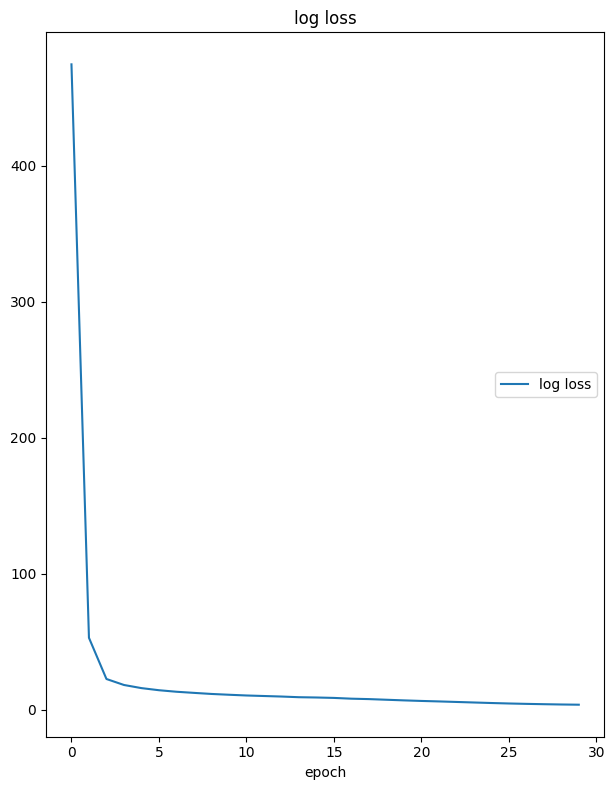

Epochs: 100%|██████████| 30/30 [05:21<00:00, 10.71s/it]

log loss
	log loss         	 (min:    3.850, max:  474.509, cur:    3.850)
Epoch [30/30] - Loss: 3.8498


In [26]:
lr = 1e-4
wd = 1e-4
betas = (0.9, 0.999)
criterion = F.mse_loss

unet = Unet(n_channels=1).to(device)
unet = unet_train_model(unet, train_loader, criterion, lr=lr, betas=betas, wd=wd, epochs=30, device=device)

### Random Search
Let's try to do a Random Search to adjust the hyperparameters :

In [44]:
def random_search_train_model(model, train_loader, criterion, lr=1e-3, betas=(0.9, 0.999), wd=1e-5, epochs=30, device='cpu'):
    model.train()

    optimiser = torch.optim.Adam(model.parameters(), lr=lr, betas=betas, weight_decay=wd)

    liveloss = PlotLosses()

    for epoch in tqdm(range(epochs), desc="Epochs"):
        logs = {'log loss': 0}
        train_loss = 0

        for batch, label in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            batch = batch.to(device)
            label = label.to(device)

            optimiser.zero_grad()

            output = model(batch)
            loss = F.mse_loss(output, label, reduction='sum')

            train_loss += loss.item()
            loss.backward()
            optimiser.step()

        logs['log loss'] = train_loss / len(train_loader.dataset)
        liveloss.update(logs)
        liveloss.draw()

        print(f"Epoch [{epoch + 1}/{epochs}] - Loss: {train_loss / len(train_loader.dataset):.4f}")

    # Return the final loss
    return train_loss / len(train_loader.dataset)


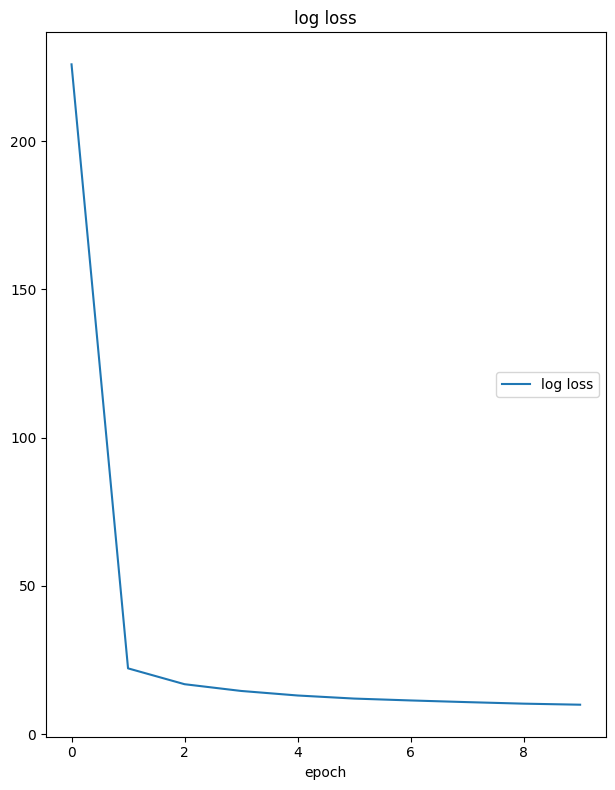

Epochs: 100%|██████████| 10/10 [01:42<00:00, 10.28s/it]

log loss
	log loss         	 (min:    9.915, max:  225.944, cur:    9.915)
Epoch [10/10] - Loss: 9.9148
Best combination: (0.0001, 0, (0.7, 0.9)) with loss: 7.732170194387436


In [49]:
# Let's try a random search

# Written with the help of ChatGPT - Reference 3
lr_values = [1e-2, 1e-3, 1e-4, 1e-5]
wd_values = [0, 0.1, 1e-2, 1e-3, 1e-4]
betas_values = [(0.7, 0.9), (0.85, 0.98), (0.9, 0.999)]

num_combinations = 27

# Generate random combinations for the search space
random_combinations = [
    (random.choice(lr_values), random.choice(wd_values), random.choice(betas_values))
    for _ in range(num_combinations)
]

results = []

for combo_idx, (lr, wd, betas) in enumerate(random_combinations):
    print(f"\n=== Running combination {combo_idx + 1}/{len(random_combinations)} ===")
    print(f"Learning Rate: {lr}, Weight Decay: {wd}, Betas: {betas}\n")

    unet = Unet(n_channels=1).to(device)
    final_loss = random_search_train_model(unet, train_loader, F.mse_loss, lr=lr, betas=betas, wd=wd, epochs=10, device=device)

    results.append({
        'combination': (lr, wd, betas),
        'final_loss': final_loss
    })

best_combination = min(results, key=lambda x: x['final_loss'])
print(f"Best combination: {best_combination['combination']} with loss: {best_combination['final_loss']}")

### Final Training with the right hyperparameters

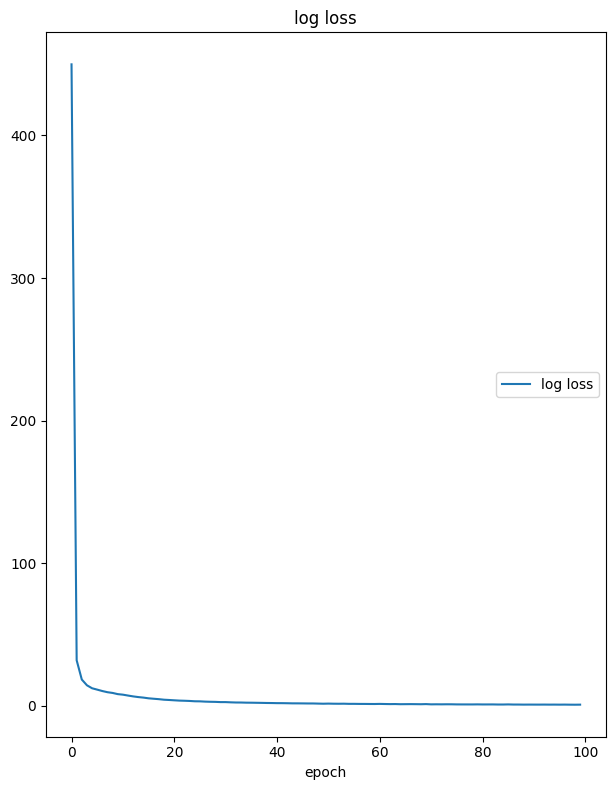

Epochs: 100%|██████████| 100/100 [17:41<00:00, 10.61s/it]

log loss
	log loss         	 (min:    0.871, max:  449.822, cur:    0.910)
Epoch [100/100] - Loss: 0.9096


In [51]:
best_lr, best_wd, best_betas = (0.0001, 0, (0.7, 0.9))
criterion = F.mse_loss

best_unet = Unet(n_channels=1).to(device)
best_unet = unet_train_model(best_unet, train_loader, criterion, lr=best_lr, betas=best_betas, wd=best_wd, epochs=100, device=device)

In [52]:
model_save_name = 'best_Unet_model.pt'
path = F"/content/drive/MyDrive/{model_save_name}"

torch.save(best_unet.state_dict(), path)

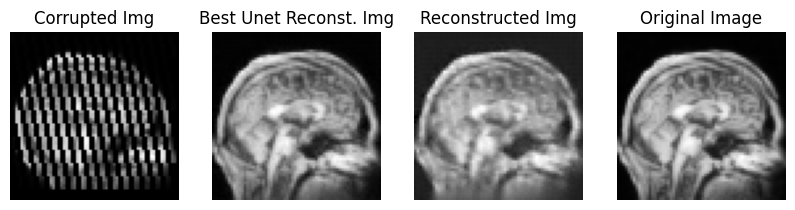

In [53]:
images, labels = next(iter(train_loader))
recon = unet(images[10].unsqueeze(0).cuda())
plt.figure(figsize=(10, 5))
plt.subplot(1, 4, 1)
plt.imshow(images[0].squeeze(), cmap='gray')
plt.title("Corrupted Img")
plt.axis('off')

recon_best = best_unet(images[10].unsqueeze(0).cuda())
plt.subplot(1, 4, 2)
plt.imshow(recon_best.cpu().detach().squeeze(), cmap='gray')
plt.title("Best Unet Reconst. Img")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(recon.cpu().detach().squeeze(), cmap='gray')
plt.title("Reconstructed Img")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(labels[10].squeeze(0).cpu(), cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.show()


In [54]:
model_save_name = 'best_Unet_model.pt'
path = F"/content/drive/MyDrive/{model_save_name}"

model = Unet(n_channels=1).to(device)
model.load_state_dict(torch.load(path))
model.eval()

<ipython-input-54-b3782ee1de45>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path))


Unet(
  (e1): EncBlock(
    (conv_block1): ConvBlock(
      (conv): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): ReLU()
    )
    (conv_block2): ConvBlock(
      (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): ReLU()
    )
    (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (e2): EncBlock(
    (conv_block1): ConvBlock(
      (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): ReLU()
    )
    (conv_block2): ConvBlock(
      (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine

### Testing on the Test Dataset

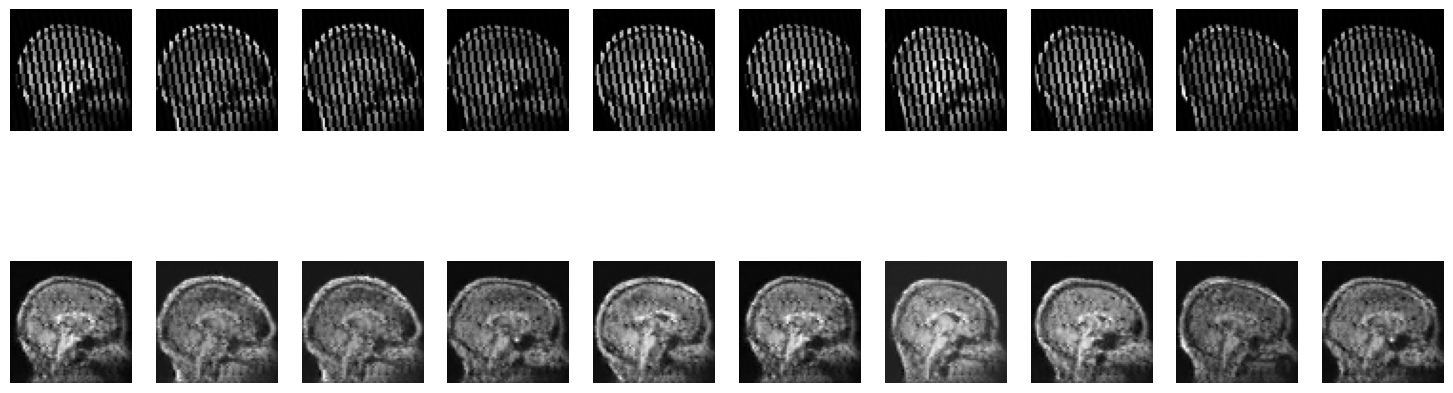

In [55]:
images = next(iter(test_loader))
_, ax = plt.subplots(2, 10, figsize=[18.5, 6])
for n, idx  in enumerate(torch.randint(0,images.shape[0], (10,))):
  recon = model(images[idx].unsqueeze(0).cuda())  # Are mu and sigma correct
  ax[0, n].imshow(images[idx].squeeze(), cmap='gray')
  ax[1, n].imshow(recon.cpu().detach().squeeze(), cmap='gray')
  ax[0, n].axis('off')
  ax[1, n].axis('off')

### Saving the images

In [56]:
reconstituted_images = []

for batch in test_loader:
    batch = batch.cuda()

    with torch.no_grad():
        reconstituted_batch = model(batch)

    reconstituted_batch_np = reconstituted_batch.cpu().numpy()

    reconstituted_images.append(reconstituted_batch_np)

reconstituted_images = np.concatenate(reconstituted_images, axis=0)

np.save('/content/drive/MyDrive/test_set_nogaps.npy', reconstituted_images)
print("images saved !")


images saved !


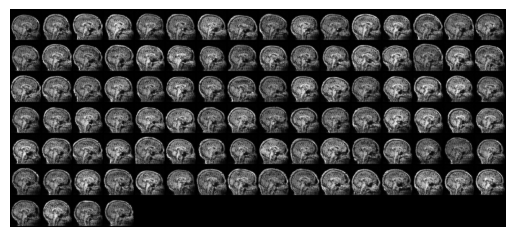

In [57]:
test_images = np.load('/content/drive/MyDrive/test_set_nogaps.npy')
test_images.shape
images_tensor = torch.tensor(test_images, dtype=torch.float32)
grid = make_grid(images_tensor, nrow=16)
# plt.figure(figsize=(10, 5))
plt.imshow(grid.permute(1, 2, 0).numpy())
plt.axis('off')
plt.show()

test_images_nogaps shape: (100, 1, 64, 64)
test_images_set shape: (100, 1, 64, 64)
images_nogaps_tensor.shape:  torch.Size([100, 1, 64, 64])


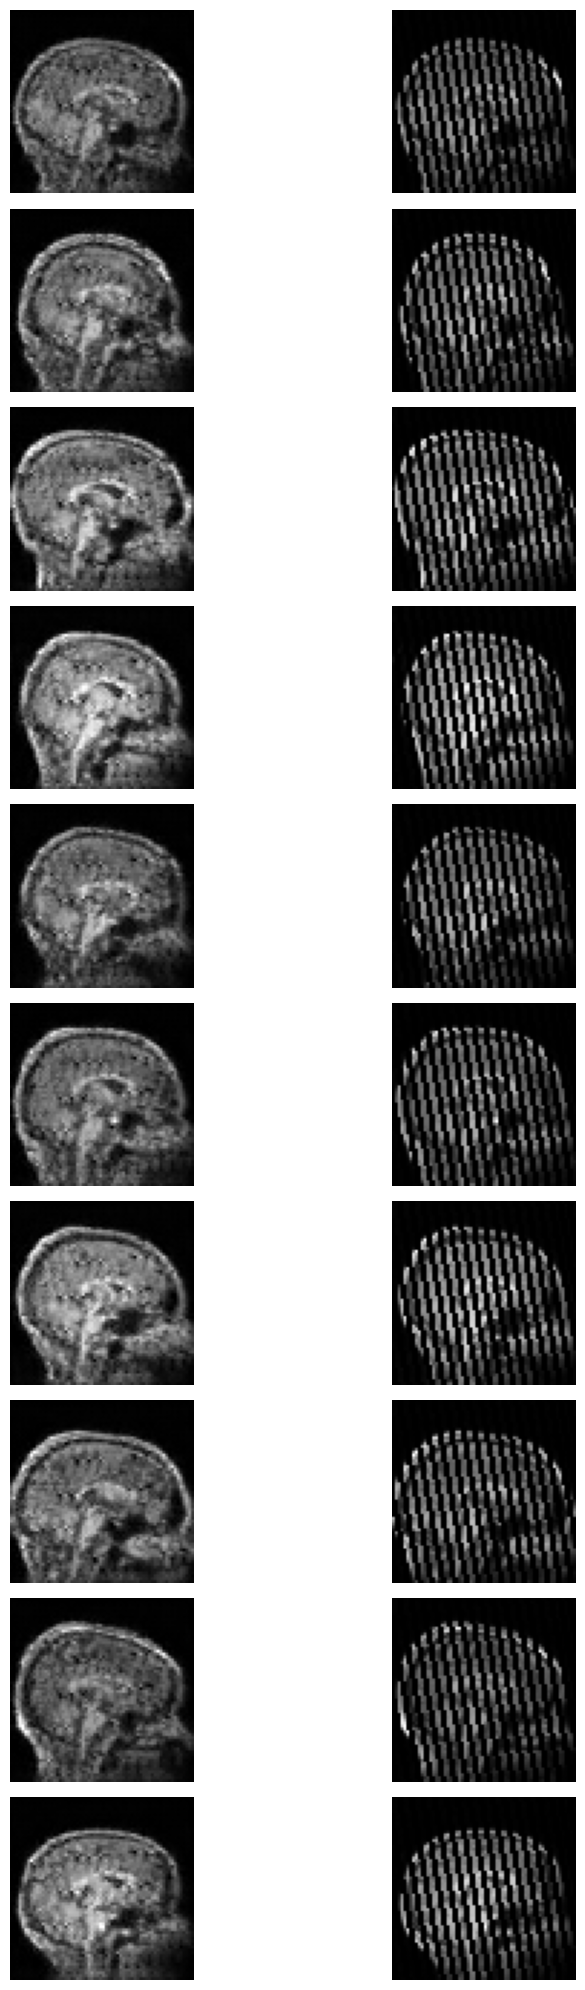

In [ ]:
# written with the help of ChatGPT - Reference 4 
# to check if the images are save in the save orders 
# in test_set.npy and test_set_nogaps.npy

def plot_side_by_side(test_nogaps_path, test_set_path, nimages=10):
    # Load the datasets
    test_images_nogaps = np.load(test_nogaps_path)
    test_images_set = np.load(test_set_path)

    # Check the shapes of the arrays
    print(f"test_images_nogaps shape: {test_images_nogaps.shape}")
    print(f"test_images_set shape: {test_images_set.shape}")

    # Convert the numpy arrays to torch tensors
    images_nogaps_tensor = torch.tensor(test_images_nogaps, dtype=torch.float32)
    print("images_nogaps_tensor.shape: ",images_nogaps_tensor.shape)
    images_set_tensor = torch.tensor(test_images_set, dtype=torch.float32)

    # Create a plot with subplots for nimages pairs
    fig, axes = plt.subplots(nimages, 2, figsize=(10, 2 * nimages))

    # Loop over the first nimages to plot them side by side
    for i in range(nimages):
        # Make grids for the images
        grid_nogaps = make_grid(images_nogaps_tensor[i:i+1], nrow=1)
        grid_set = make_grid(images_set_tensor[i:i+1], nrow=1)

        # Plot the first image from test_nogaps
        ax1 = axes[i, 0]
        ax1.imshow(grid_nogaps.permute(1, 2, 0).numpy())
        ax1.axis('off')

        # Plot the first image from test_set
        ax2 = axes[i, 1]
        ax2.imshow(grid_set.permute(1, 2, 0).numpy())
        ax2.axis('off')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Usage example:
plot_side_by_side('/content/drive/MyDrive/test_set_nogaps.npy', '/content/drive/MyDrive/DL_cw/test_set.npy')


### 3. **Conclusion**

The model that I chose is a U-Net architecture like we saw it in the lectures with a Encoder and Decoder both using convolutional blocks.

I chose the U-Net model over the Convolutional VAE because it produced significantly better and more accurate reconstructed images.

Additionally, the loss plot for the Convolutional VAE appeared unusual and did not accurately reflect the model's true performance. In contrast, the U-Net model’s loss was easier to plot and analyze. When I first tried U-Net, the training for U-Net showed a very promising loss at the end, close to zero.

Furthermore, I prefered a U-Net architecture to a GAN architecture because it was easier to train. I tried to train a WGAN but it was particularly unstable: my discriminator was too strong and the images generated at the end did not ressemble the original pictures at all.

Initially, I manually selected the hyperparameters and began training with a small number of epochs (5-10). I adjusted parameters like the learning rate and weight decay individually, retraining the model after each change. The model's performance was very satisfactory, and I could have kept the hyperparameters I had chosen. However, I decided to try a random search mostly because I did not know how to adjust the betas values since they involve two separate parameters. After the random search, I obtained the following hyperparameters : `lr = 0.0001, wd = 0.01, betas = (0.85, 0.98)`. The results was very satisfactory, so I tested this model on my test set and saved the reconstitued images in `test_set_nogaps.npy`.